# Лабораторная работа 2

## Полносвязная нейронная сеть

Реализовать нейронную сеть, состоящую из двух полносвязных слоев и решающую задачу классификации на наборе данных из лабораторной работы 1.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from scripts.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

1. Добавьте реализации методов класса TwoLayerNet . Проверьте вашу реализацию на модельных данных (Код приведен ниже).  

In [11]:
input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Прямой проход: вычисление выхода сети

Реализуйте первую часть  метода TwoLayerNet.loss, вычисляющую оценки классов для входных данных. 

Сравните ваш выход сети с эталонными значениями. Ошибка должна быть очень маленькой (можете ориентироваться на значение < 1e-7) .

In [12]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()


print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08



# Прямой проход: вычисление loss

Реализуйте вторую часть метода, вычисляющую значение функции потерь. Сравните с эталоном. Ошибка должна быть очень маленькой (можете ориентироваться на значение < 1e-12) .

In [13]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
0.007487675865472498


# Обратный проход

Реализуйте третью часть метода loss. Используйте численную реализацию расчета градиента для проверки вашей реализации обратного прохода.  Если прямой и обратный проходы реализованы верно, то ошибка будет < 1e-8 для каждой из переменных W1, W2, b1, и b2. 


In [14]:
from scripts.gradient_check import eval_numerical_gradient

loss, grads = net.loss(X, y, reg=0.05)

for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 1.590292e-02
b2 max relative error: 4.447646e-11
W1 max relative error: 1.677532e-01
b1 max relative error: 2.738421e-09


# Обучение нейронной сети на смоделированных данных

Реализуйте методы TwoLayerNet.train и TwoLayerNet.predict. Обучайте сеть до тех пор, пока значение loss не будет < 0.02.


Final training loss:  0.01714341096088244


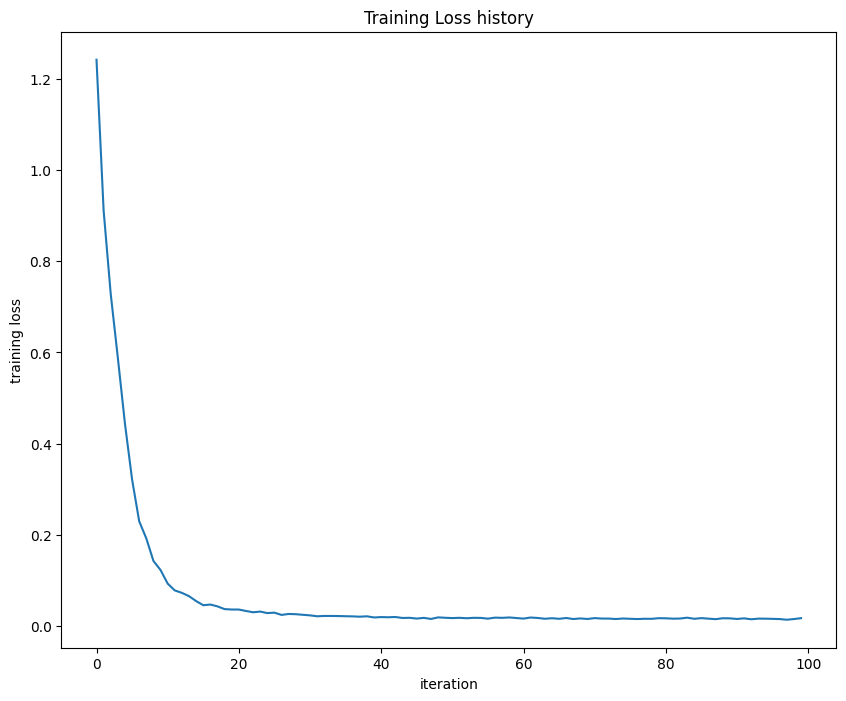

In [15]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])


plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Обучение нейронной сети на реальном наборе данных (CIFAR-10, MNIST)

Загрузите набор данных, соответствующий вашему варианту. 

Разделите данные на обучающую, тестовую и валидационную выборки.

Выполните предобработку данных, как в ЛР 1. 

Обучите нейронную сеть на ваших данных. 

При сдаче лабораторной работы объясните значения всех параметров метода train.

Clear previously loaded data.
Training data shape:  (40000, 3072)
Training labels shape:  (40000,)
Validate data shape:  (10000, 3072)
Validate labels shape:  (10000,)
Test data shape:  (10000, 3072)
Test labels shape:  (10000,)
[130.7684   136.171275 132.65505  130.20785  135.563275 131.963675
 131.0624   136.314875 132.6495   131.50975 ]


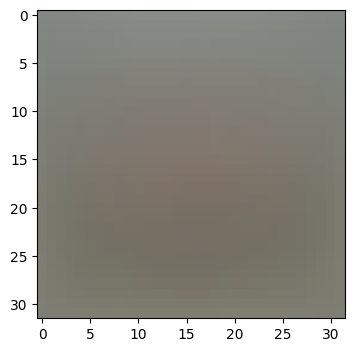

(40000, 3072) (10000, 3072) (10000, 3072)


In [16]:
from sklearn.model_selection import train_test_split
import random
import numpy as np
import matplotlib.pyplot as plt
from scripts.data_utils import load_CIFAR10

cifar10_dir = 'scripts/datasets/cifar-10-batches-py'

try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Validate data shape: ', X_val.shape)
print('Validate labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

mean_image = np.mean(X_train, axis=0)
print(mean_image[:10]) 
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) 
plt.show()

X_train -= mean_image
X_val -= mean_image
X_test -= mean_image

print(X_train.shape, X_val.shape, X_test.shape)

In [17]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 1000: loss 2.307779
iteration 100 / 1000: loss 2.307429
iteration 200 / 1000: loss 2.304636
iteration 300 / 1000: loss 2.279954
iteration 400 / 1000: loss 2.180483
iteration 500 / 1000: loss 2.087402
iteration 600 / 1000: loss 2.144293
iteration 700 / 1000: loss 2.110573
iteration 800 / 1000: loss 1.960399
iteration 900 / 1000: loss 2.059638
Validation accuracy:  0.2734


Используя параметры по умолчанию, вы можете получить accuracy, примерно равный 0.29. 

Проведите настройку гиперпараметров для увеличения accuracy. Поэкспериментируйте со значениями гиперпараметров, например, с количеством скрытых слоев, количеством эпох, скорости обучения и др. Ваша цель - максимально увеличить accuracy полносвязной сети на валидационном наборе. Различные эксперименты приветствуются. Например, вы можете использовать методы для сокращения размерности признакового пространства (например, PCA), добавить dropout слои и др. 

Для лучшей модели вычислите acсuracy на тестовом наборе. 

Для отладки процесса обучения часто помогают графики изменения loss и accuracy в процессе обучения. Ниже приведен код построения таких графиков. 

In [20]:
input_size = 32 * 32 * 3
num_classes = 10

hidden_sizes = [50, 75, 100]
lerning_rates = [1e-3, 1e-4, 1e-5]
regs = [0.125, 0.25, 0.5]
batch_sizes = [100, 200, 400]
num_iterss = [500, 1000, 2000]

opt_hidden_size = 0
opt_lerning_rate = 0
opt_reg = 0
opt_batch_size = 0
max_val_acc = 0

for hidden_size in hidden_sizes:
    for lerning_rate in lerning_rates:
        for reg in regs:
            for batch_size in batch_sizes:
                for num_iters in num_iterss:

                    net = TwoLayerNet(input_size, hidden_size, num_classes)
                    
                    stats = net.train(X_train, y_train, X_val, y_val,
                    num_iters=num_iters, batch_size=batch_size,
                    learning_rate=lerning_rate, learning_rate_decay=0.95,
                    reg=reg, verbose=False)
        
                    val_acc = (net.predict(X_val) == y_val).mean()
                    print('Validation accuracy: %f, learning_rates: %f , reg: %f, hidden_size: %f, batch_size: %f' % (val_acc, lerning_rate, reg, hidden_size, batch_size))
    
                    if(max_val_acc < val_acc):
                        opt_hidden_size = hidden_size
                        opt_lerning_rate = lerning_rate 
                        opt_reg = reg
                        opt_batch_size = batch_size
                        max_val_acc = val_acc

Validation accuracy: 0.408300, learning_rates: 0.001000 , reg: 0.125000, hidden_size: 50.000000, batch_size: 100.000000
Validation accuracy: 0.452400, learning_rates: 0.001000 , reg: 0.125000, hidden_size: 50.000000, batch_size: 100.000000
Validation accuracy: 0.463600, learning_rates: 0.001000 , reg: 0.125000, hidden_size: 50.000000, batch_size: 100.000000
Validation accuracy: 0.420900, learning_rates: 0.001000 , reg: 0.125000, hidden_size: 50.000000, batch_size: 200.000000
Validation accuracy: 0.464800, learning_rates: 0.001000 , reg: 0.125000, hidden_size: 50.000000, batch_size: 200.000000
Validation accuracy: 0.478900, learning_rates: 0.001000 , reg: 0.125000, hidden_size: 50.000000, batch_size: 200.000000
Validation accuracy: 0.428100, learning_rates: 0.001000 , reg: 0.125000, hidden_size: 50.000000, batch_size: 400.000000
Validation accuracy: 0.472500, learning_rates: 0.001000 , reg: 0.125000, hidden_size: 50.000000, batch_size: 400.000000
Validation accuracy: 0.483800, learning_

iteration 0 / 2000: loss 2.317255
iteration 100 / 2000: loss 1.978644
iteration 200 / 2000: loss 1.786511
iteration 300 / 2000: loss 1.719224
iteration 400 / 2000: loss 1.723304
iteration 500 / 2000: loss 1.678813
iteration 600 / 2000: loss 1.622854
iteration 700 / 2000: loss 1.649496
iteration 800 / 2000: loss 1.544461
iteration 900 / 2000: loss 1.640983
iteration 1000 / 2000: loss 1.568768
iteration 1100 / 2000: loss 1.557187
iteration 1200 / 2000: loss 1.561375
iteration 1300 / 2000: loss 1.521950
iteration 1400 / 2000: loss 1.602941
iteration 1500 / 2000: loss 1.484222
iteration 1600 / 2000: loss 1.517382
iteration 1700 / 2000: loss 1.552568
iteration 1800 / 2000: loss 1.489476
iteration 1900 / 2000: loss 1.456478


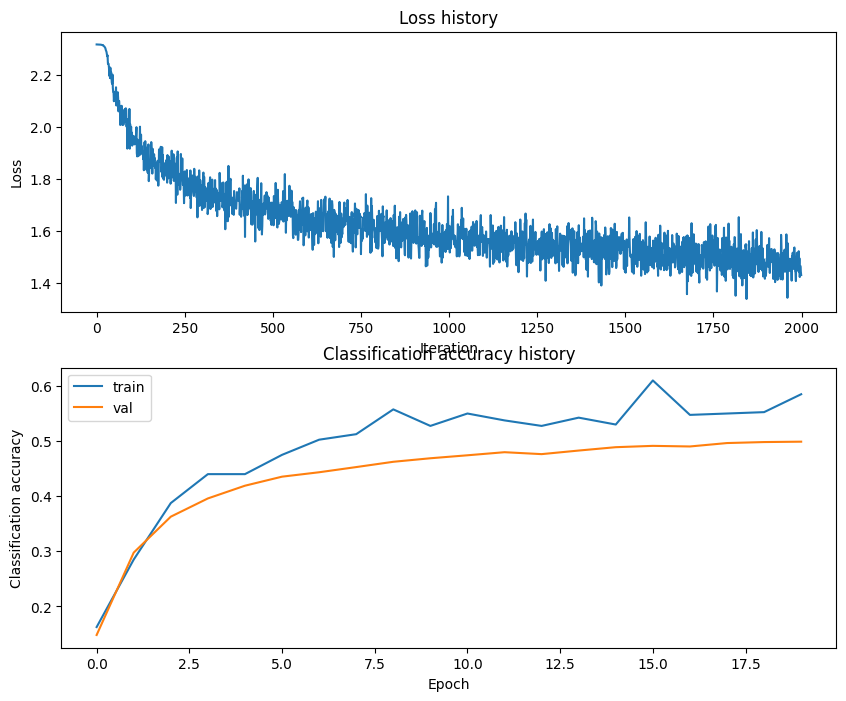

test predict: 0.5068


In [21]:
net = TwoLayerNet(input_size, opt_hidden_size, num_classes)

stats = net.train(X_train, y_train, X_val, y_val,
num_iters=2000, batch_size=opt_batch_size,
learning_rate=opt_lerning_rate, learning_rate_decay=0.95,
reg=opt_reg, verbose=True)

plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

print("test predict:", ((net.predict(X_test) == y_test).mean()))

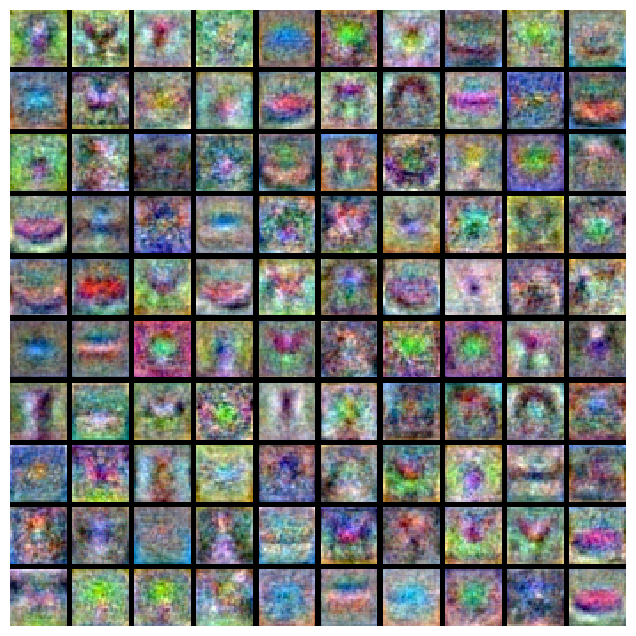

In [22]:
from scripts.vis_utils import visualize_grid

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

Сделайте выводы по результатам работы. 

В данной работе удалось добиться точности в 50% с помощью двуслойной полносвязной нейронной сети, когда как с помощью других методов машинного обучения максимальная точность составляла 35%(SVM). Также стоит отметить, что при 3х слойная нейронная сеть по какой-то причине не обучалась.